In [2]:
## Problema 1
import numpy as np
### numero de condicion ######
from numpy import linalg as LA
a = np.array([[1, 0, -1], [0, 1, 0], [1, 0, 1]])
LA.cond(a)
LA.cond(a, 'fro')
LA.cond(a, np.inf)
LA.cond(a, -np.inf)
LA.cond(a, 1)
LA.cond(a, -1)
LA.cond(a, 2)


1.4142135623730951

68212052.53926545


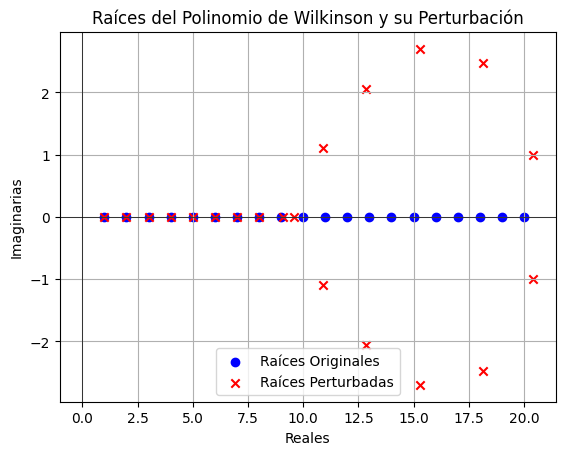

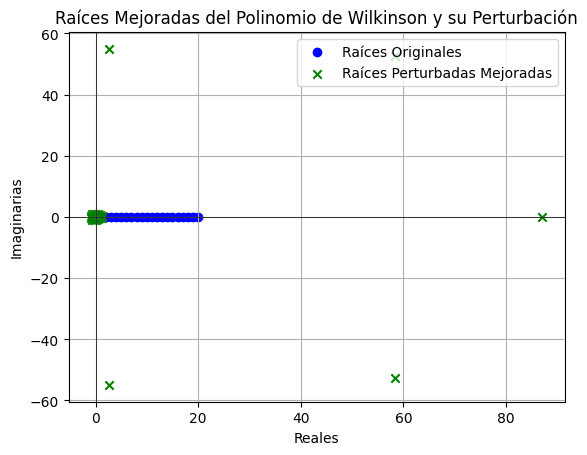

In [42]:
# PROBLEMA 2
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

# Definir el polinomio de Wilkinson y su perturbación
w_roots = np.arange(1, 21)
W = np.poly(w_roots)
perturb = np.zeros_like(W)
perturb[1] = 1e-7
W_perturb = W + perturb

# Encontrar las raíces del polinomio perturbado
perturbed_roots = np.roots(W_perturb)

# Ordenar las raíces para comparación
w_roots = np.sort(w_roots)
perturbed_roots = np.sort(perturbed_roots)

# Calcular y mostrar la norma de las raíces perturbadas respecto a las originales
norm_ratio = LA.norm(perturbed_roots - w_roots) / LA.norm(perturb)
print(norm_ratio)

# Graficar las raíces originales y perturbadas
plt.scatter(w_roots, np.zeros_like(w_roots), label='Raíces Originales', color='blue')
plt.scatter(perturbed_roots.real, perturbed_roots.imag, label='Raíces Perturbadas', color='red', marker='x')
plt.legend()
plt.title('Raíces del Polinomio de Wilkinson y su Perturbación')
plt.xlabel('Reales')
plt.ylabel('Imaginarias')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid(True)
plt.show()

# Calcular coeficientes del polinomio de Wilkinson usando multiplicación anidada
def wilkinson_coefficients(r):
    coef = [1]
    for root in r:
        coef = np.polymul(coef, [1, -root])
    return coef

W_improved = wilkinson_coefficients(w_roots)
perturb = np.zeros_like(W_improved)
perturb[1] = 1e-7
W_improved_perturb = W_improved + perturb
perturbed_roots_improved = np.roots(W_improved_perturb)
perturbed_roots_improved = np.sort(perturbed_roots_improved)

# Graficar las raíces mejoradas
plt.scatter(w_roots, np.zeros_like(w_roots), label='Raíces Originales', color='blue')
plt.scatter(perturbed_roots_improved.real, perturbed_roots_improved.imag, label='Raíces Perturbadas Mejoradas', color='green', marker='x')
plt.legend()
plt.title('Raíces Mejoradas del Polinomio de Wilkinson y su Perturbación')
plt.xlabel('Reales')
plt.ylabel('Imaginarias')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid(True)
plt.show()


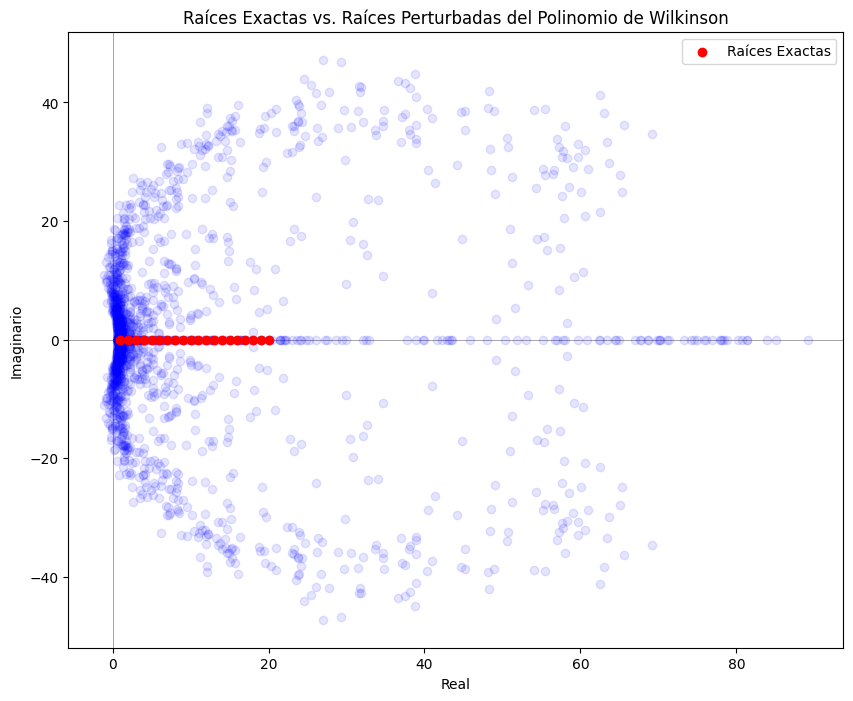

In [43]:
# PROBLEMA 3

# Configurar el experimento con el polinomio de Wilkinson y perturbaciones aleatorias
num_experiments = 100
mu, sigma = 0, np.exp(-10)**0.5  # media y desviación estándar para las perturbaciones

# Coeficientes del polinomio de Wilkinson
w_roots_exact = np.arange(1, 21)
W_exact = np.poly(w_roots_exact)

# Almacenar las raíces perturbadas de todos los experimentos
all_perturbed_roots = np.zeros((num_experiments, len(w_roots_exact)), dtype=complex)

# Realizar experimentos
for i in range(num_experiments):
    # Generar perturbaciones aleatorias centradas en 1
    r_i = np.random.normal(mu, sigma, W_exact.shape) + 1
    # Aplicar perturbaciones a los coeficientes
    W_perturbed = W_exact * r_i
    # Encontrar las raíces del polinomio perturbado
    perturbed_roots = np.roots(W_perturbed)
    all_perturbed_roots[i, :] = np.sort(perturbed_roots)

# Graficar las raíces exactas y perturbadas
plt.figure(figsize=(10, 8))
# Raíces exactas
plt.scatter(w_roots_exact, np.zeros_like(w_roots_exact), color='red', label='Raíces Exactas', zorder=3)
# Raíces perturbadas
for i in range(num_experiments):
    plt.scatter(all_perturbed_roots[i, :].real, all_perturbed_roots[i, :].imag, color='blue', alpha=0.1, zorder=2)
plt.xlabel('Real')
plt.ylabel('Imaginario')
plt.title('Raíces Exactas vs. Raíces Perturbadas del Polinomio de Wilkinson')
plt.axhline(0, color='grey', lw=0.5, zorder=1)
plt.axvline(0, color='grey', lw=0.5, zorder=1)
plt.legend()
plt.show()


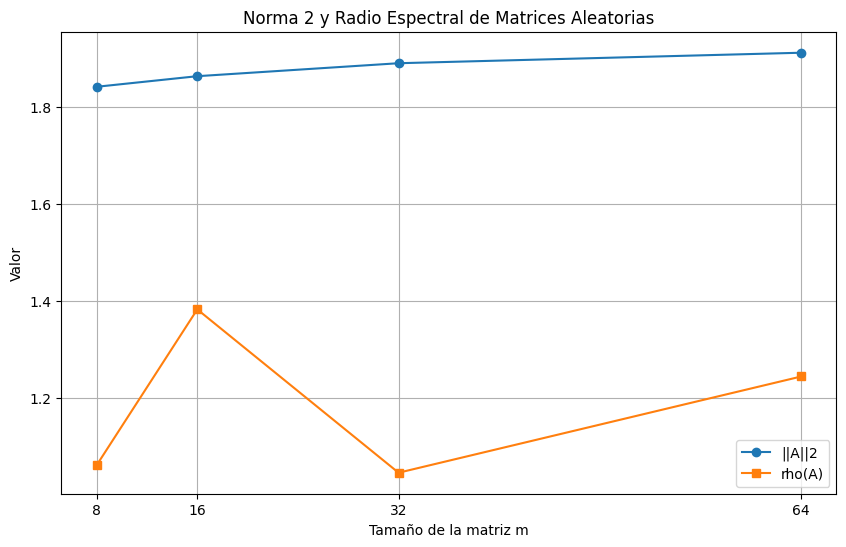

In [2]:
# EJERCICIO 7

import numpy as np
import matplotlib.pyplot as plt

# Tamaños de las matrices
ms = [8, 16, 32, 64]

# Inicializar listas para guardar los valores de norma 2 y radio espectral
norms_2 = []
spectral_radii = []

# Generar matrices y calcular norma 2 y radio espectral
for m in ms:
    # Generar matriz aleatoria con entradas de distribución normal
    A = np.random.normal(0, m**(-1/2), (m, m))
    # Calcular norma 2
    norm_2 = np.linalg.norm(A, 2)
    norms_2.append(norm_2)
    # Calcular valores propios y luego el radio espectral
    eigenvalues = np.linalg.eigvals(A)
    rho_A = max(abs(eigenvalues))
    spectral_radii.append(rho_A)
    
plt.figure(figsize=(10, 6))
plt.plot(ms, norms_2, label='||A||2', marker='o')
plt.plot(ms, spectral_radii, label='rho(A)', marker='s')
plt.xlabel('Tamaño de la matriz m')
plt.ylabel('Valor')
plt.title('Norma 2 y Radio Espectral de Matrices Aleatorias')
plt.legend()
plt.grid(True)
plt.xticks(ms)
plt.show()